In [1]:
import sys
import os
parent_dir = os.path.abspath('..')
sys.path.append(parent_dir)

In [2]:
from utils import *
from __init__ import b, c
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Load Data

In [3]:
days_since_inception, price_log10, price = get_data('../data/btc-usd-max.csv')

### Make Predictions

In [4]:
future_days = 2700
end = days_since_inception[-1]+future_days
predictions = model(np.arange(0, end, 1), b, c)
predictions_log10 = np.log10(predictions)
price = np.append(price, np.full(future_days, np.nan))

### Make Figure

In [5]:
plt.style.use('ggplot')

In [6]:
# Convert days since inception into actual dates (for plotting purposes)
start_date = pd.to_datetime('2009-01-03')

# Generate date arrays for both actual and predicted data
dates_actual = start_date + pd.to_timedelta(np.arange(days_since_inception[0], end-1, 1), 'D')
dates_pred = start_date + pd.to_timedelta(np.arange(0, end, 1), 'D')

#### Log Scale

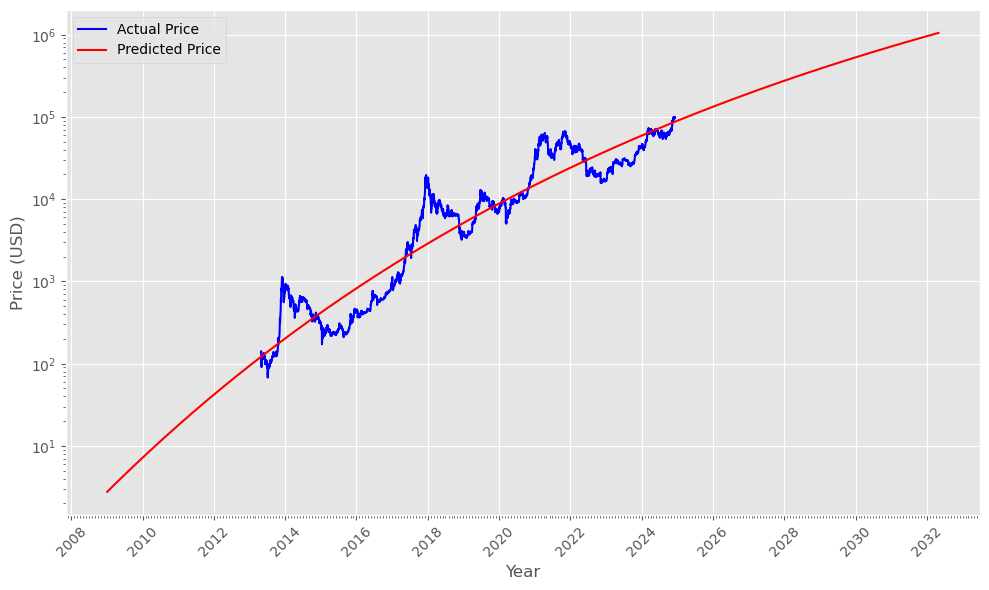

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.yscale('log')

ax.plot(dates_actual, price, label='Actual Price', color='blue')  # Customize color/design as needed
ax.plot(dates_pred, predictions, label='Predicted Price', color='red')  # Customize color/design as needed

ax.set_xlabel('Year')
ax.set_ylabel('Price (USD)')
ax.legend()

# Formatting the x-axis to display only years
ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('./log.png', dpi=400)
plt.show();